# Final Project: Deep Learning with TensorFlow

In this project we will work through the process of:
1. installing TensorFlow in your local environment
2. Learn some basics of how to use TensorFlow API
3. Implement a classical linear regression model with TensorFlow
4. Implement a k-means for clustering images
5. Import and Train a model with FashionNIST dataset 
6. Predict new images based on the trained model

This project should give you some basic knowledge on how to work with deep learning systems. Although we do not implement any neural networks from scratch in this lab, it is also important for you to have an understanding of how neural networks work.Please refer to classnotes to see how neural networks are trained. In this project we will use existing libraries, but by selecting and tuning parameters.

# Part 0 - Install TensorFlow

# Initialize 

In [2]:
# # Task 0.4. all the import we need
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras     # we can also access keras API with tf.keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
# now we are ready to move on to doing some amazing things.

1.14.0


# Part 1 - Getting to know TensorFlow (TF)
TensorFlow is a framework. This core open source library help you develop and train ML models. You can install tensorflow locally or run tensorflow on colab.research.google.com directly in your browser. TensorFlow supports wide range of devices and API's, including javascript for deploying mobile ML based applications. It can run on single CPU systems, GPUs, TPU's as well as mobile devices and large scale distributed systems of hundreds of machines.
TensorFlow is its own framework. Everything in TF is implemented as a computational graph. The graph nodes are executed at later times. 
Let us understand some of its basic API functionality.

## Task 1.1 Learn the basics
TensorFlow is a framework to allow efficient computing with multi-dimensional data. All the calls to TF are executed through API calls. It uses python (altough there are other TF suported languages now such as R)  in the backend to exceute these commands. All objects are stored as tensors, a form of a vector. A TF graph can be evaluated using a tensorflow session.

In [3]:
# create two constant tensors
two_node = tf.constant(8)     
three_node = tf.constant(9)
# sum of the two tensors
sum_node = two_node + three_node    # need a session to evaluate the value of sum_node
# product the two objects
pdt_node = two_node * three_node
print(sum_node)                   # should notice that they are just unevaluated tensors
# A session is an object instance that encapsulate the state and operations on the object.

with tf.Session() as sess:
    print(sess.run([sum_node, pdt_node]))


Tensor("add:0", shape=(), dtype=int32)
[17, 72]


## Loops in TensorFlow

In [4]:
i = tf.constant(0)
cond = lambda i: tf.less(i, 12) #compare if (i < 12)
body = lambda i: tf.add(i, 1)
r = tf.while_loop(cond, body, [i])   # returns the final value of i
with tf.Session() as sess:
    print(sess.run(r))


12


### Another Example of a While Loop

In [5]:
def cond(t1, t2):
    return tf.less(t1, t2)

def body(t1, t2):
    return [tf.add(t1, 1), t2]

t1 = tf.constant(2)
t2 = tf.constant(4)

res = tf.while_loop(cond, body, [t1, t2])

with tf.Session() as sess:
    print(sess.run(res))

[4, 4]


## Task 1.2 Find the first 10 Fibbonachchi numbers
In this activity we will write TF code using tensorflow framework to output the first 10 Fibonnachi numbers 1 1 2 3 5 8 13 21 34 55 as a list

In [6]:
fib1 = tf.constant(1)
fib2 = tf.constant(1)
y = tf.identity(fib1)
y1 = tf.identity(fib2)
fib_nums = [y, y1]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(8):
        temp = y + y1
        y = y1
        y1 = temp
        fib_nums.append(temp)

    print(sess.run(fib_nums))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [7]:
# two tensor placeholders that can hold int32 data
x = tf.placeholder(tf.int32)      # x can hold int32 
y = tf.placeholder(tf.int32)       # y can hold int32 

# Find sum, difference and product
sumOf = tf.add(x,y)            # use tf.add
diff =  tf.subtract(x,y)            # use tf.subtract
prod =  tf.multiply(x,y)            # use tf.multiply

# store inputs as a dictionary
dict_values = {x:20,y:30}          # store values x = 20 and y = 30 as a dictionay

# run a session
with tf.Session() as sess:
    print('Sum',sess.run(sumOf,feed_dict=dict_values))
    print('Difference',sess.run(diff,feed_dict=dict_values))
    print('Product',sess.run(prod,feed_dict=dict_values))

Sum 50
Difference -10
Product 600


## Task 1.4 Matrix Operations

In [8]:
import numpy as np
# initialize numpy arrays a and b
a = np.array([[5.0,5.0]])               
b = np.array([[2.0],[2.0]])  

# define two tensors mat1 and mat2 using numpy arrays a and b
mat1 = tf.constant(a)               # mat1 is a rank-1 tensor               
mat2 = tf.constant(b)               # mat2 is a rank-2 tensor  


# build a matrix multiplier tensor
matrix_pdt = tf.matmul(mat1, mat2)    # use tf.matmul to find the result
# run a session and perform the operartions

with tf.Session() as sess:
    result = sess.run(matrix_pdt)
    print(result)

[[20.]]


# Part 2 Linear Regression with TensorFlow
We have learned how to implement linear regression using Pandas. In this exercise, we will learn how to use tensorflow to implement linear regression. As stated TensorFlow is a framework that allows you to implement many standard ML algorithms. We will implement Linear Regression using TF libraries.

## Task 2.1 set up

In [9]:
# initialize
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# BEGIN SOLUTION
# set parameters
alpha = 0.0001    # alpha is the learning rate
epochs = 5000   # One epoch is when an entire dataset is passed both forward and backward through the neural network 
                # only once
step = 50       # every 50 iterations display the results.

## Task 2.2 Read data
We will work with our CS 205 Data set. First we create a data frame, then extract midterm and final exam scores as numpy arrays.

In [10]:
# Read the Training Data
import pandas as pd
df = pd.read_csv("data/midterm_finals_CS205F18.csv")
# use first 110 records for the training data
train_X = df.midterm.head(110)
train_Y = df.Finals.head(110)

# use the remaining for validation
validate_X = df.midterm.tail(28)
validate_Y = df.Finals.tail(28)

n_samples = train_X.shape[0]
print("training set size: ", n_samples) 
print("validation set size: ", validate_X.shape[0])    

training set size:  110
validation set size:  28


## Task 2.3 Intialize model

In [11]:
# tf Graph Input. We will feed the values later using feed_dict.
X = tf.placeholder(tf.float32,[step])
Y = tf.placeholder(tf.float32,[step])

# Variables are manipulated via the tf.Variable class. A tf.Variable represents a tensor 
# whose value can be changed by running ops on it. tf.Variable exists outside the context of a single session.run call.

theta = tf.Variable(0.0)   # define tf.Variable theta and initialize to some value
b = tf.Variable(0.0)      # define tf.Variable bias b and initialize


## Task 2.4 Linear Model

In [12]:
# Construct a linear model using tf.add and tf.multiply. The model provides y = theta*x + bias

predictor = tf.add(tf.multiply(X,theta),b)

In [13]:
# Compute the average squared error using TF calls
# Mean squared error
cost = tf.reduce_mean(tf.square(Y-predictor))
# Use the Gradient descent Optimizer from tf.train
# Gradient descent
optimizer =  tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cost)

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

## Task 2.5 Train the Model
Train the linear regression model by running the training data through the network.

In [15]:
with tf.Session() as sess:
    sess.run(init)
            
    for i in range(850):
        rand_ind = np.random.randint(len(train_X),size = step)
        feed = {X:train_X[rand_ind], Y:train_Y[rand_ind]}
        _,costValue = sess.run([train,cost], feed_dict = feed)
        # Displaying the result after every 50 epochs
        if (i+1)%step==0:
            print("Epoch", (i + 1), ": cost =",costValue, "theta =", sess.run(theta), "b =", sess.run(b)) 
    model_theta , model_b = sess.run([theta, b])

Epoch 50 : cost = 18.423655 theta = 0.7725677 b = 0.05508479
Epoch 100 : cost = 21.829756 theta = 0.88587046 b = 0.06622576
Epoch 150 : cost = 22.874205 theta = 0.89820147 b = 0.0700144
Epoch 200 : cost = 20.43225 theta = 0.90575194 b = 0.07364371
Epoch 250 : cost = 23.70009 theta = 0.9052964 b = 0.077049166
Epoch 300 : cost = 25.912888 theta = 0.9104605 b = 0.08047906
Epoch 350 : cost = 12.584179 theta = 0.90714854 b = 0.083279364
Epoch 400 : cost = 15.70553 theta = 0.90872395 b = 0.0870854
Epoch 450 : cost = 11.829376 theta = 0.90812016 b = 0.09066484
Epoch 500 : cost = 16.798086 theta = 0.89955014 b = 0.093320675
Epoch 550 : cost = 17.100872 theta = 0.9013834 b = 0.09683234
Epoch 600 : cost = 22.079247 theta = 0.8984965 b = 0.09995116
Epoch 650 : cost = 24.552637 theta = 0.8996136 b = 0.10323051
Epoch 700 : cost = 19.5379 theta = 0.8962328 b = 0.10642075
Epoch 750 : cost = 13.179701 theta = 0.89737016 b = 0.1094369
Epoch 800 : cost = 17.192167 theta = 0.9018244 b = 0.11308439
Epoch 

## Task 2.6 Display Regression Line

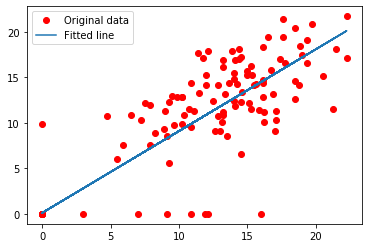

In [16]:
#Graphic display 
y_hat = model_theta * train_X + model_b
with tf.Session() as sess:
    sess.run(init)
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, y_hat, label='Fitted line')
    plt.legend()
    plt.show()

## Task 2.7 Compare with Validation Data
We have some validation samples and let us see where the line fits

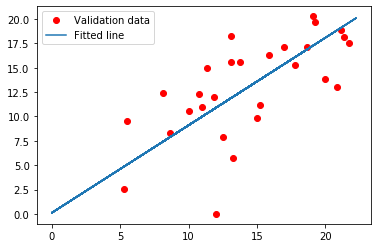

In [17]:
with tf.Session() as sess:
    sess.run(init)
    plt.plot(validate_X, validate_Y, 'ro', label='Validation data')
    plt.plot(train_X, y_hat, label='Fitted line')
    plt.legend()
    plt.show()

# Part 3 - MNIST Dataset

## Task 3.1 download the MNIST dataset

In [18]:
import tensorflow as tf
# get the MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Task 3.2 Learn about the data set.
- how big is the training set?
- how big is the test set?

In [19]:
from tensorflow.examples.tutorials.mnist import input_data

# get training images from MNIST
train_images = mnist.train.images.shape[0]
# how big is test images?
test_images = mnist.test.images.shape[0]
# how big is validation set?
validation_images = mnist.validation.images.shape[0]

print("\ntest images:", test_images, "validation images:", validation_images)


test images: 10000 validation images: 5000


## Visualize the data set
Each image is a 28 x 28 gray-scale 2D image. Display the images images[0] and images[1] as 2D images.
Then flatten and display image[0] to understand the form of the data.

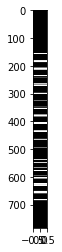

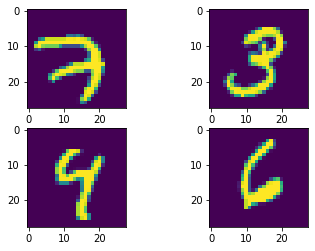

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt1 = plt.imshow(mnist.train.images[0].reshape(28,28))
plt2 = plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')  # gray scale
# flatten images[1] and display
plt3 = plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

# show first 4 images side by side. 
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mnist.train.images[0].reshape(28,28))
axarr[0,1].imshow(mnist.train.images[1].reshape(28,28))
axarr[1,0].imshow(mnist.train.images[2].reshape(28,28))
axarr[1,1].imshow(mnist.train.images[3].reshape(28,28))


# Handwriting classification with k-means
In this part, we will use the MNIST dataset to import 60,000 handwritten digits and implement k-means to classify them. MNIST is a benchmark dataset that can help learn many things about Deep Learning basics.

## Task 3.3 Visualize the image
Each image is a gray-scale 28x28 (784 pixles) image. You can treat the image as a rank-1 tensor (or 1D vector) of size 784 with each value between 0-255. We can plot some images here.

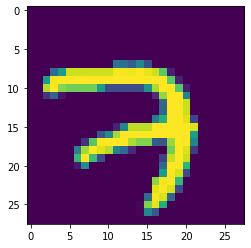

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
mnist.train.image = mnist.train.images / 255.0
plt1 = plt.imshow(mnist.train.image[0].reshape(28,28))  # visualize image[1]

## Task 3.4 Implementing k-means algorithm

### Task 3.4.1 Implement the k-means algorithm (vectorized)

In [22]:
def kmeans(X, k, max_iter = 100, rand_seed = 0):
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        #Computing the distance between all points and all clusters
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        #Computing the cluster assignment of each point,
        C = np.eye(k)[np.argmin(D,axis=1),:]
        #Recomputing the centers to be the average of their points         
        Mu = (C.T @ X)/np.sum(C,axis=0)[:,None]
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2
    #return these clusters plus the squared loss itself.
    return Mu, C, loss

### Task 3.4.2 Cluster MNIST images.
Experiment to Find a good value of k such that most centers look like images.

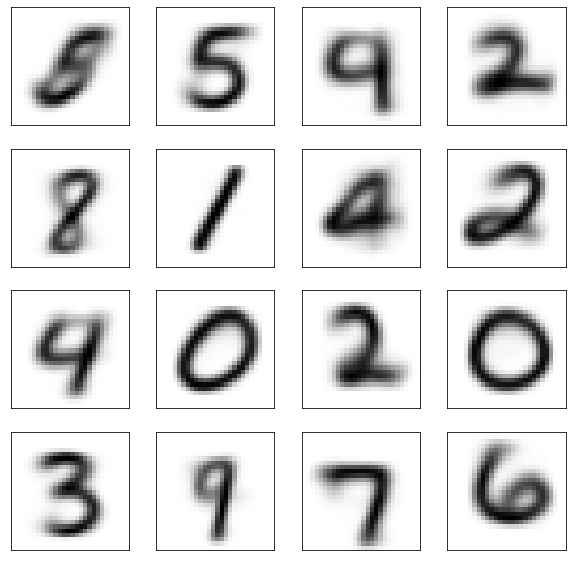

In [23]:
# start with k = 50
k = 50
# flatten each image to be 784 value vector and form 55000 x 784 matrix X
X = mnist.train.images.reshape(55000,784)

# Choose k random centers from X. That is k random data points become the original cluster centers

Mu =  X[np.random.choice(X.shape[0],k)]
# call the kmeans algorithm defined above. Be sure to have the proper arguments passed to kmeans.
[Mu, y, loss] = kmeans(X,50,max_iter=10,rand_seed=0)
# print(Mu, y,loss)
# Plot the cluster centers as images
# create figure with subplots using matplotlib.pyplot
figure = plt.figure(figsize=(10,10))
for i in range(16):
    # define subplot
    plt.subplot(4,4, 1 + i)
    # plot raw pixel data
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Mu[i].reshape(28,28), cmap=plt.cm.binary)
# show the figure
plt.show()


# First Exercise in Deep Learning
Deep Learning has become quite popular in recent times (since 2012) due to its remarkable advances in applications including self driving cars, image recognition, and voice to text conversion. The hello world of deep learning (DL) is long considered to be the exercise that uses of the MNIST hand-written digits dataset that was created by Yann Lecun in 1998. Yann LeCunn who is a professor at NYU and Director of AI at Facebook, just won the 2019 Turing Award for his contributions to Deep Learning. Let us go through a series of exercises to learn how to read, train and validate an image data set. In this case the 60,000 handwritten images of 0-9.

## Task 3.5 Create a Model

In [24]:
import tensorflow as tf

# create a placeholder
x = tf.placeholder(tf.float32,shape=[None,784])  # 784 = mnist.train.images[1].shape

# there are 10 possible numbers that the classifier must recognize
# start with a matrix 784x10 of all zeros
thetas = tf.Variable(tf.zeros([784,10]))

# create a tf.Variable of 10 zeros (we need to find 10 categories 0-9)
b = tf.Variable(tf.zeros([10]))

# Create the Graph thetas*x + b
y = tf.nn.softmax(tf.matmul(x,thetas)+b)

# loss and optimizer
y_true = tf.placeholder(tf.float32, [None, 10])


# Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a 
# probability value between 0 and 1.
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(y), reduction_indices=[1]))

# optimizer is a Gradient Descent Optimizer
optimizer =  tf.train.GradientDescentOptimizer(learning_rate=0.5)

# training model using optimizer.minimize. Pass cross_entrophy as the argument
train = optimizer.minimize(cross_entropy)

## Task 3.6 Create a Session and Train

In [25]:
# initialize all global variables
init = tf.global_variables_initializer()

Suggestions: 
- Train the model for 1000 steps on the training set
- Use the built in batch feeder from minist for conveninece
- Test the Train Model and print out the accuracy of the Model

In [26]:
sess = tf.Session()
sess.run(init)
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train, feed_dict={x: batch_xs, y_true: batch_ys})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))


0.9184


# Part 4 - Classification of Fashion images

## Task 4.1 Set up

In [27]:
# import the fashionMNISt data set and separate training and test sets
# use keras.datasets.fashion_mnist
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

## Task 4.2 Explore this data set

In [28]:
# add classnames label images (ints) corresponds to thses labels. For example label 0 is T-shirt/top
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# how many images and their dimensions
print("Train: images=%s, labels=%s" % (train_images.shape, train_labels.shape))
print("Test: images=%s, labels=%s" % (test_images.shape, test_labels.shape))
# what is the length of the training set?

# how do the training labels look like?
# find more about test_images shape and labels
print("Label: ", train_labels[0], "->", class_names[train_labels[0]])

Train: images=(60000, 28, 28), labels=(60000,)
Test: images=(10000, 28, 28), labels=(10000,)
Label:  9 -> Ankle boot


## Task 4.3 Visualize images in the data set

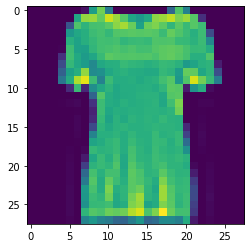

In [29]:
# visualize an image[10] in this data set
plt1 = plt.imshow(train_images[10].reshape(28,28))

## Task 4.4 Plotting images

In [30]:
# scale the images
train_images = train_images / 255.0
test_images = test_images / 255.0

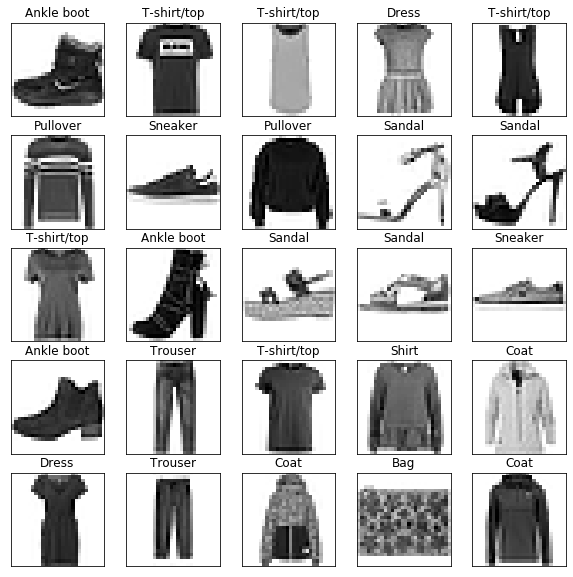

In [31]:
# plot the first 25 images and their class_names in a 5x5 grid 
figure = plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5, 1 + i, title=class_names[train_labels[i]])
    # plot raw pixel data
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
# show the figure
plt.show()

## Task 4.5 Model Creation and Compilation

In [32]:
# create a keras.sequential model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
# compile the model. 
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Task 4.6 Fit the model
Fit the model to training images.

In [34]:
# Train the classifier.
model.fit(
            train_images,
            train_labels,
            epochs=5,
            validation_data=(test_images, test_labels),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5013 - acc: 0.8243 - val_loss: 0.4441 - val_acc: 0.8370
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3792 - acc: 0.8631 - val_loss: 0.3885 - val_acc: 0.8612
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3376 - acc: 0.8766 - val_loss: 0.3807 - val_acc: 0.8619
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3121 - acc: 0.8860 - val_loss: 0.3564 - val_acc: 0.8682
Epoch 5/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2949 - acc: 0.8906 - val_loss: 0.3415 - val_acc: 0.8769


## Task 4.7 Test Accuracy
Using model.evaluate (see https://keras.io/models/model/) find the test_loss and test_accuracy

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=128)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 12us/sample - loss: 0.3415 - acc: 0.8769
Test accuracy: 0.8769


## Task 4.8 Predicting
using model.predict, create a prediction model for test_images

In [36]:
# create a prediction model for the test images
predictions = model.predict(test_images)


In [37]:
## Check to see the accuracy of model prediction
# how well the model predicted an image?
# A prediction is an array of 10 numbers. 
# They represent the model's "confidence" that the image corresponds to each of 
# the 10 different articles of clothing. 

print(predictions[0])
print("The highest confience value = %s, test_label = %s" 
      % (np.argmax(predictions[0]), test_labels[0]))


[3.9965926e-06 6.8084439e-08 3.7679291e-07 1.2536997e-07 2.1822757e-06
 1.0334486e-02 7.4947440e-07 1.9982899e-02 5.0021772e-06 9.6967018e-01]
The highest confience value = 9, test_label = 9


## Task 4.9 Plotting the Predictor confidence
Use the following function plot_image to plot the predictor confidence.

In [38]:
# code by François Chollet
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

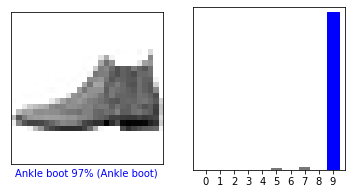

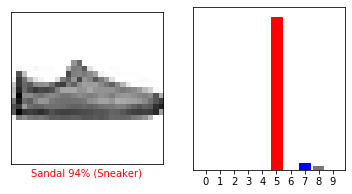

In [39]:
# use the plot_image to display images and how well they were predicted.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)


## Task 4.10
Plot a 20 images (shown as 5x4 grid) to see test images and their confidence

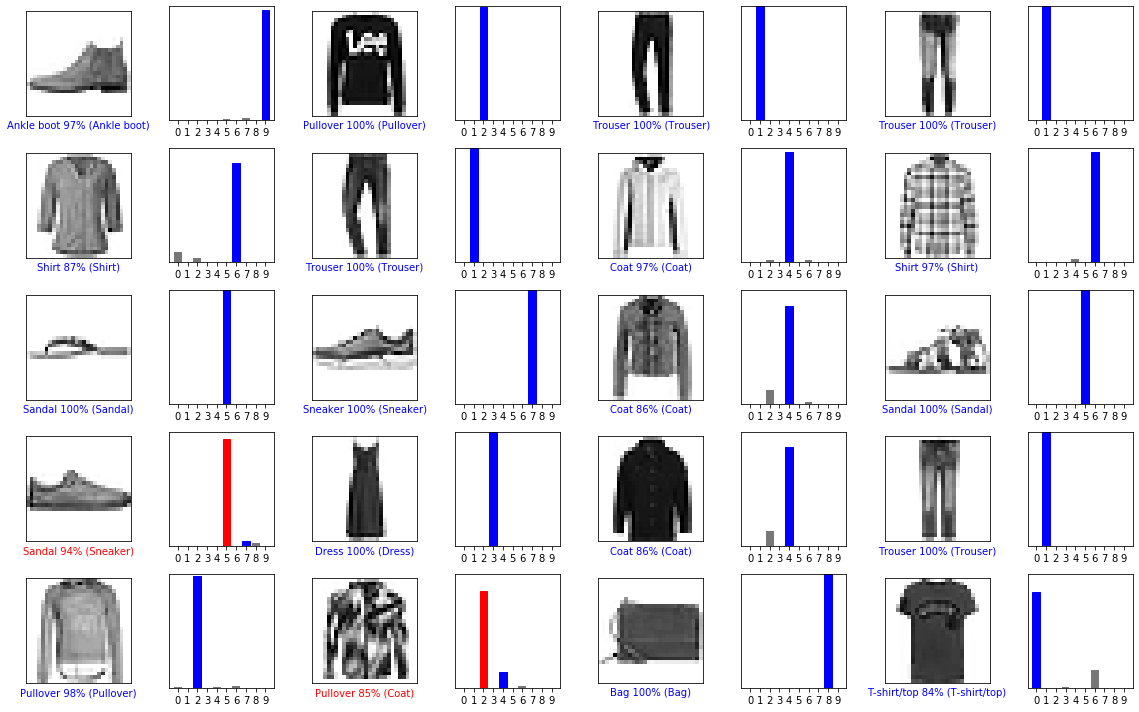

In [40]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Lab designed by A.D. Gunawardena, 2019. Acknowledgements: Google TensorFlow group